
# ASSIGNED Linear BVP



This boundary value problem is linear.

$y'' + y = 0$

With boundary conditions $y(0) = 0$ and $y(\pi/2) = 2$

First, derive the equations that approximate this equation using finite differences. You should write out the equations in a form that allow you to construct a set of linear equations, e.g. $\mathbf{A} \mathbf{y} = \mathbf{b}$.



Next, write code to construct $\mathbf{A}$ and $\mathbf{b}$, and solve for $\mathbf{y}$.



Show some evidence that your solution is reasonable.



Finally, there is a known analytical solution to this equation: $y = 2 \sin x$. Compare your answer to the known solution.




## solution



The key to this problem is to derive the finite difference formulas:

$y_{j+1} - 2 y_j + y_{j-1} + h^2 y_j= 0$

$y_{j-1} + (h^2 - 2) y_j + y_{j+1} = 0$

and then to construct the matrix. These matrices are called Toeplitz matrices, and there is an easy way to construct them in numpy.



In [1]:
import numpy as np
N = 50
x, h = np.linspace(0, np.pi/2, N, retstep=True)

from scipy.linalg import toeplitz
r = np.zeros(N - 2)
r[0] = h**2  - 2
r[1] = 1

c = np.zeros(N - 2)
c[0] = h**2 - 2
c[1] = 1
A = toeplitz(c, r)

# Here is an alternative approach.
# A = np.eye(N - 2) * (h**2 * _lambda - 2)
# U = np.diag(np.ones(N - 3), 1)
# L = np.diag(np.ones(N - 3), -1)

# A = A + U + L

Then you just build up the right hand side of the equation to finally yield:

$\mathbf{A} \mathbf{y} = \mathbf{b}$

and solve for $\mathbf{y}$ with `np.linalg.solve`. Don't forget to add the boundary conditions back on to the solution. We know the analytical solution to this BVP, it is $y(x) = 2 \sin(x)$, so we plot it for comparison.



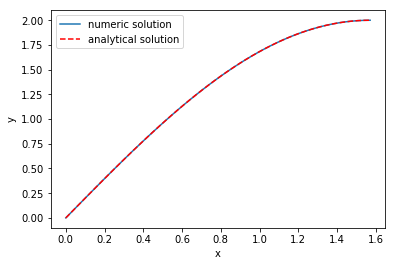

In [1]:
b = np.zeros(N - 2)
b[-1] = -2
y_inner = np.linalg.solve(A, b)

# add the boundary values back on.
y = np.concatenate([[0], y_inner, [2]])

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.plot(x, 2 * np.sin(x), 'r--') # analytical solution
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['numeric solution', 'analytical solution'])

These two solutions are visually indistinguishable.

